In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://disk.yandex.ru/d/v5-lEOh3BCIYoQ'

In [3]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [4]:
# подготовка ссылок для загрузки в датафреймы
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=path))
response = requests.get(final_url)
download_url = response.json()['href']

In [6]:
df = pd.read_csv(download_url)

In [16]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


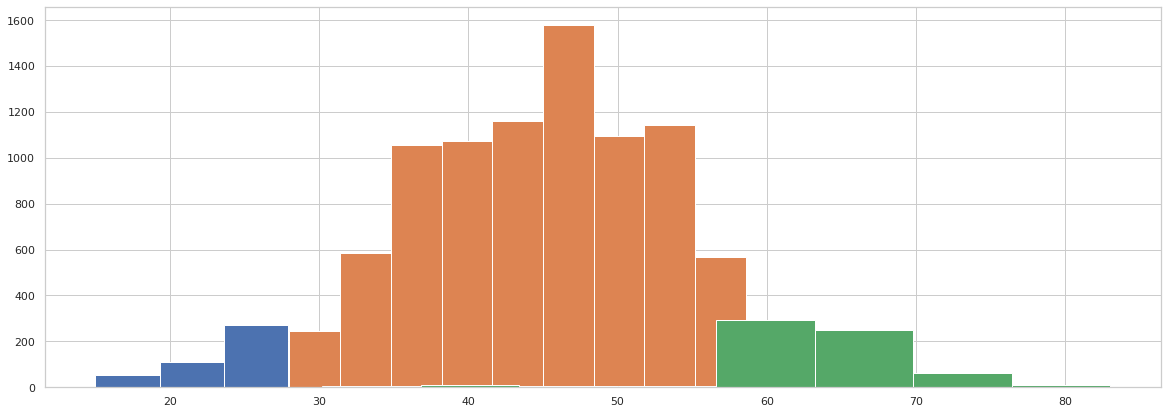

In [30]:
control = df.query('experiment_group == "control"') \
            .groupby('district') \
            .delivery_time \
            .hist()

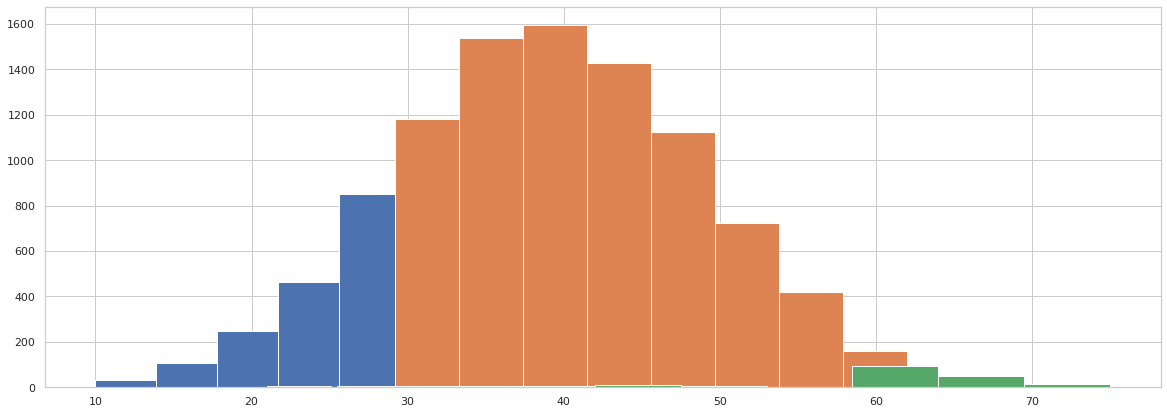

In [31]:
test = df.query('experiment_group == "test"') \
            .groupby('district') \
            .delivery_time \
            .hist()

In [34]:
df.experiment_group.value_counts()[0] - df.experiment_group.value_counts()[1]

12

In [42]:
# проводим семплирование тестовой выборки
test_sample = df[df['experiment_group'] == 'test']['delivery_time'] \
.sample(1000, random_state=17)

In [43]:
# проводим семплирование контрольной выборки
control_sample = df[df['experiment_group'] == 'control']['delivery_time'] \
.sample(1000, random_state=17)

In [44]:
# тест Шапиро-Уилка: нормально ли распределение тестовой выборки
# при p>0.05 - распределение считаем нормальным
scipy.stats.shapiro(test_sample)

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

In [45]:
# тест Шапиро-Уилка: нормально ли распределение контрольной выборки
# при p>0.05 - распределение считаем нормальным
scipy.stats.shapiro(control_sample)

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [48]:
# расчет стандартного отклонения тестовой выборки
round(np.std(df.query('experiment_group == "test"') \
            .delivery_time), 2)

9.88

In [49]:
# расчет стандартного отклонения контрольной выборки
round(np.std(df.query('experiment_group == "control"') \
            .delivery_time), 2)

9.99

In [53]:
# используем тест Т-стьюдента для выявления статистически значимого различия выборок (p-value)
test_deliv_time = df.query('experiment_group == "test"').delivery_time
control_deliv_time = df.query('experiment_group == "control"').delivery_time
scipy.stats.ttest_ind(test_deliv_time, control_deliv_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [55]:
test_mean = test_deliv_time.mean()
control_mean = control_deliv_time.mean()

In [56]:
# вычисляем % изменения среднего значения времени доставки
round(((test_mean - control_mean) / control_mean) * 100, 2)

-13.35